#Using NumPy and Pandas
Imputing values with NumPy and Pandas is a piece of cake. In the example below, both columns A and B have one missing value each. Column A then has its mean taken using the **nanmean()** function in NumPy which calculates the mean while ignoring any missing values. The same process is applied to column B with the median instead. The **fillna()** function is then applied to each column to fill in the missing values. The output of this code is shown below with the righthand side containing the imputed values for each respective column.

In [1]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'A': [1, 2, np.nan, 4, 5],
                   'B': [1, 7, 7, 7, np.nan]})
print(df)
A_mean = np.nanmean(df.A)
B_median = np.nanmedian(df.B)

df.A.fillna(A_mean, inplace=True)
df.B.fillna(B_median, inplace=True)
df

     A    B
0  1.0  1.0
1  2.0  7.0
2  NaN  7.0
3  4.0  7.0
4  5.0  NaN


,A,B
0,1.0,1.0
1,2.0,7.0
2,3.0,7.0
3,4.0,7.0
4,5.0,7.0


#Using SimpleImputer
Scitkit-learn’s SimpleImputer (view documentation) is another way to impute missing values. While it may seem slightly more convoluted than the example with NumPy and Pandas, there are a few key benefits to using SimpleImputer. First, the missing value can be set to whatever value you’d like and does not have to be equivalent to np.nan as it does using the fillna() function in Pandas. Additionally, the **imputation strategy** can easily be changed between one of the following four options simply by altering the strategy argument:

##"mean" — replaces missing values with the mean
##"median" — replaces missing values with the median
##"most_frequent" — replaces missing values with the most frequent value
##"constant" — replaces missing values with whatever value is specified in the **fill_value** argument. This could be useful in a scenario in which you want to replace missing values **with a string** saying “missing” rather than an actual value.


In [2]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

df = pd.DataFrame({'A': [2, 2, np.nan, np.nan, np.nan, 8]})
print(df)
imputer = SimpleImputer(strategy='mean')
imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(imputed, columns=df.columns)

df_imputed

     A
0  2.0
1  2.0
2  NaN
3  NaN
4  NaN
5  8.0


,A
0,2.0
1,2.0
2,4.0
3,4.0
4,4.0
5,8.0


#Iterative Imputation
Useful only when working with **multivariate data,** the IterativeImputer in scikit-learn (view documentation) utilizes the data available in other features in order to estimate the missing values being imputed. It does so through an…

**…iterated round-robin fashion:**-----> **at each step, a feature column is designated as output y and the other feature columns are treated as inputs X.** A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for **max_iter** imputation rounds. The results of the final imputation round are returned. [Source]

If that still seems a bit abstract, hopefully the following example will help clear things up. Due to the IterativeImputer still being experimental, importing **enable_iterative_imputer** is a requirement for use.

In [3]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df = pd.DataFrame({'A': [2, 3, np.nan, 5],
                   'B': [np.nan, 9, 16, 25]})
print(df)
# Setting the random_state argument for reproducibility
imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(imputed, columns=df.columns)

round(df_imputed, 2)

     A     B
0  2.0   NaN
1  3.0   9.0
2  NaN  16.0
3  5.0  25.0


,A,B
0,2.00,1.0
1,3.00,9.0
2,3.87,16.0
3,5.00,25.0


#The underlying pattern for this dummy data was intended for column B to be the **square** of column A. While not perfect, the IterativeImputer did result in a value somewhat close to the “true” value of 16.0 being filled in. Comparing the result to what would have been achieved using a mean imputation strategy (12.7) or a median imputation strategy (9.0) clearly shows the benefit of using an iterative imputation strategy in this case.

#I chose to compare the Pressure9am and Pressure3pm features as they are directly related to one another and exhibit a linear relationship which will be useful for evaluation purposes. The code below imputes the missing data with the three different strategies, plots the data along with a regression line, and then displays the root mean squared error **(RMSE, lower is better).**

In [1]:
# Imports and settings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.metrics import mean_squared_error

sns.set_theme(style='darkgrid')


In [2]:
# Reading in the data and selecting the continous features
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.isnull().sum().sort_values(ascending=False)

Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
Rainfall          3261
RainToday         3261
WindSpeed3pm      3062
Humidity9am       2654
Temp9am           1767
WindSpeed9am      1767
MinTemp           1485
MaxTemp           1261
Location             0
Date                 0
dtype: int64

In [4]:
#Percentage of missing values.
df.isnull().sum().sort_values(ascending=False)/len(df) *100

Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindDir9am        7.263853
WindGustDir       7.098859
WindGustSpeed     7.055548
Humidity3pm       3.098446
WindDir3pm        2.906641
Temp3pm           2.481094
RainTomorrow      2.245978
Rainfall          2.241853
RainToday         2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
Temp9am           1.214767
WindSpeed9am      1.214767
MinTemp           1.020899
MaxTemp           0.866905
Location          0.000000
Date              0.000000
dtype: float64

<Axes: >

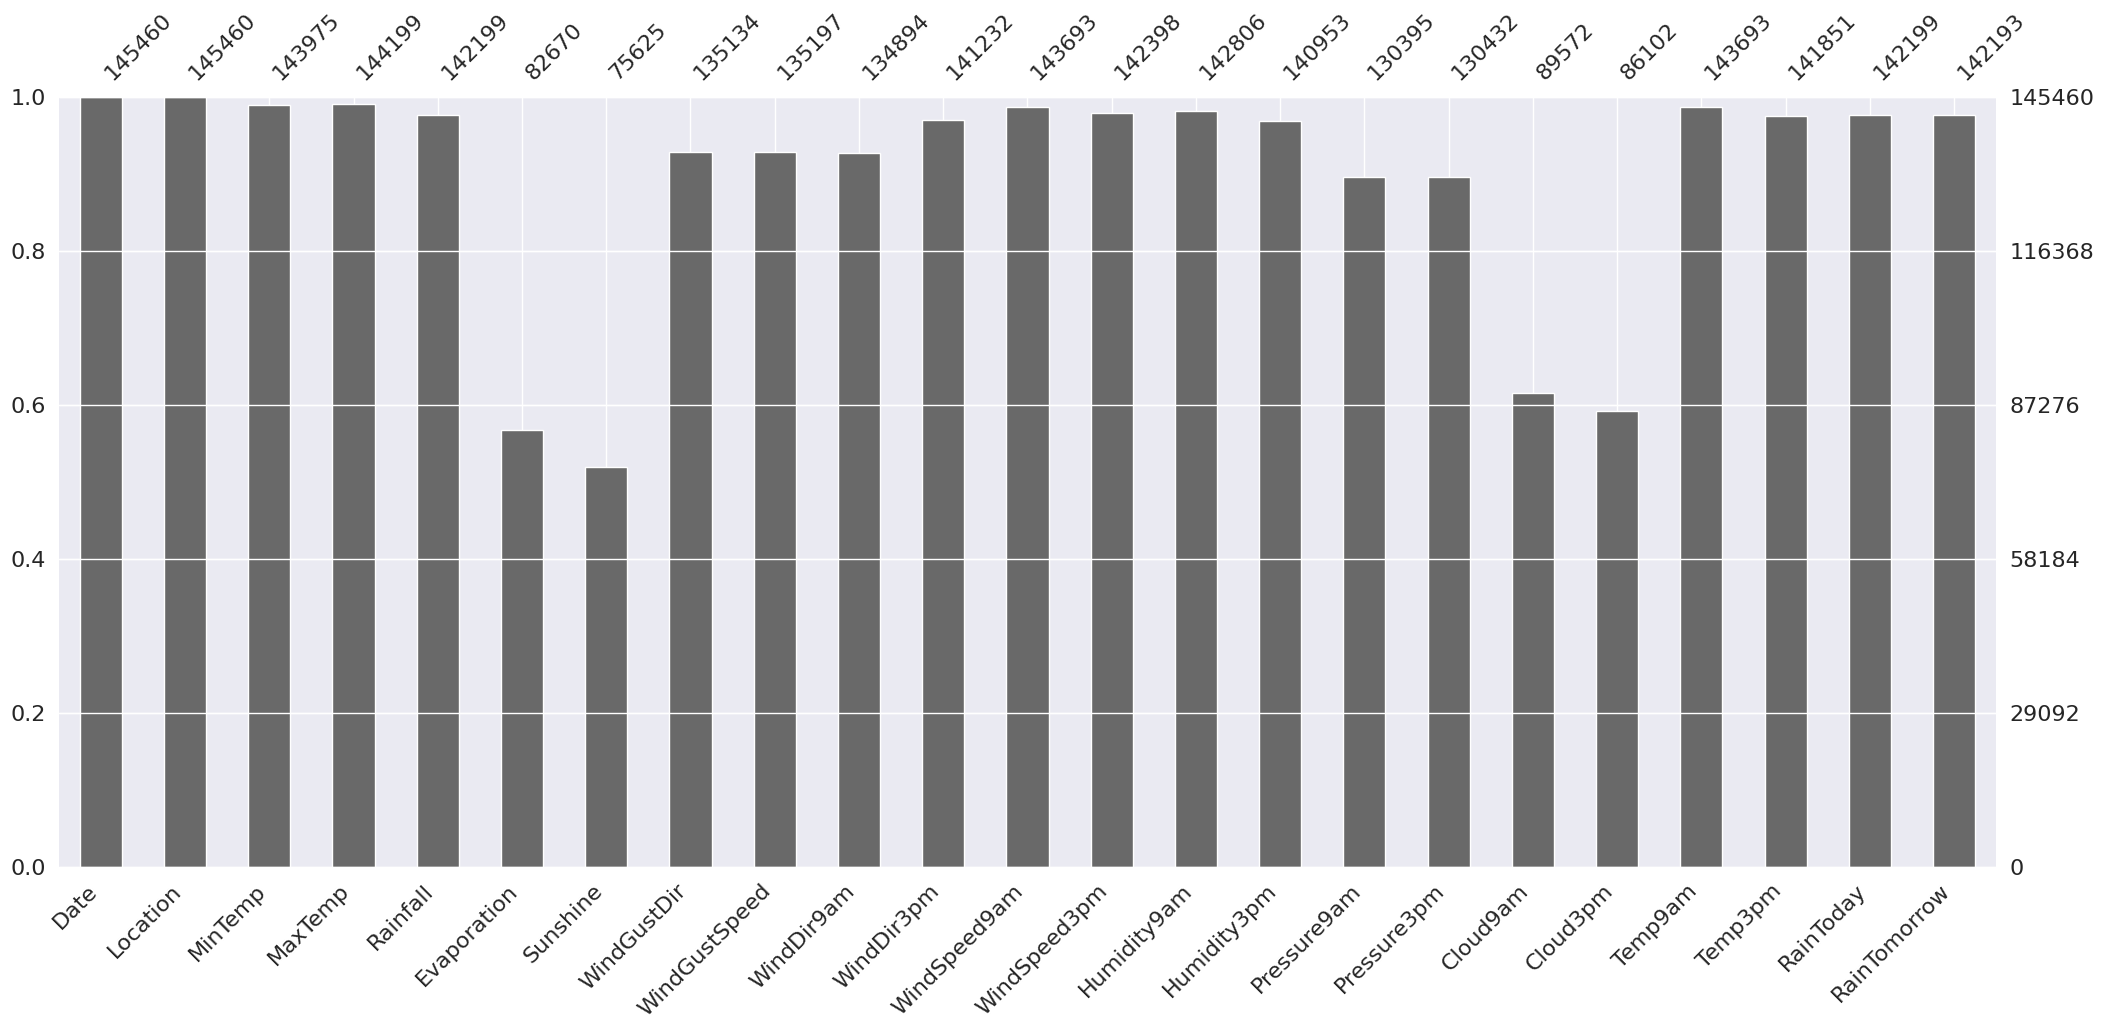

In [5]:
import missingno as msno
msno.bar(df)

<Axes: >

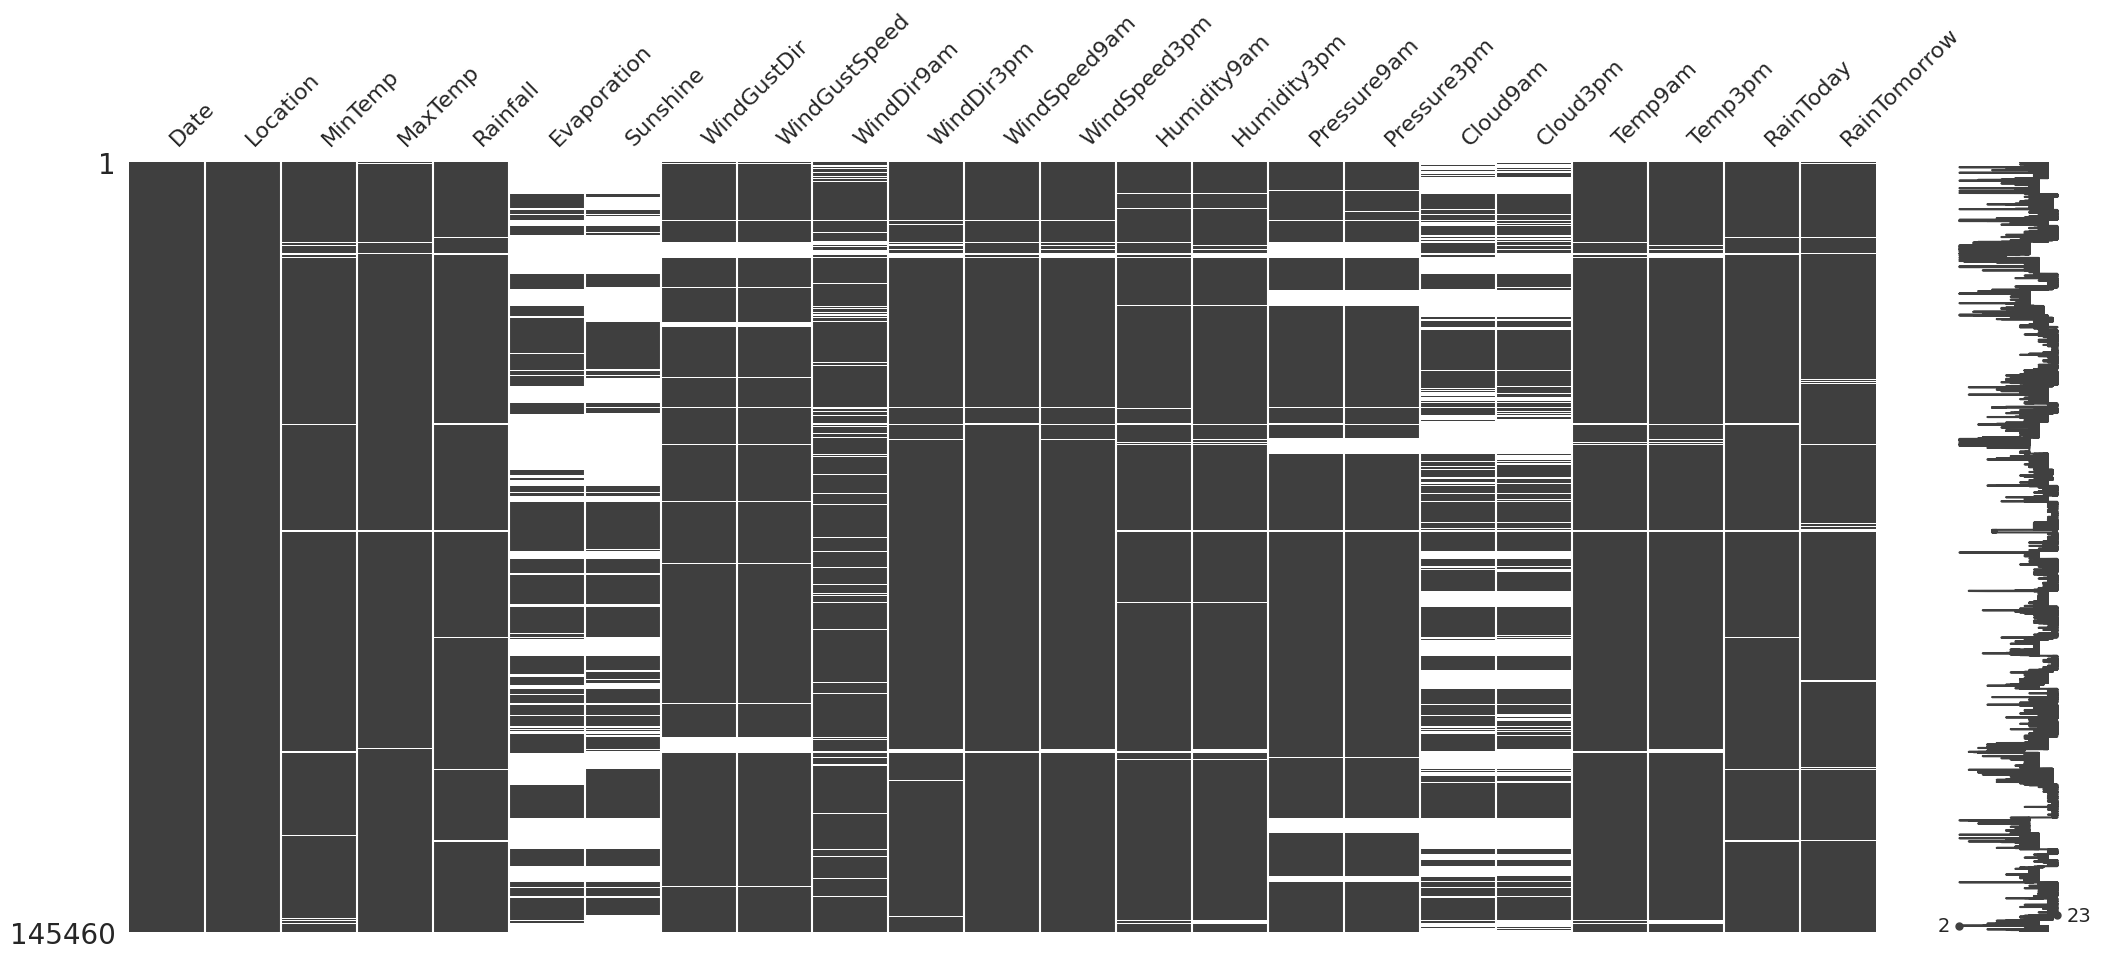

In [6]:
msno.matrix(df)

<Axes: >

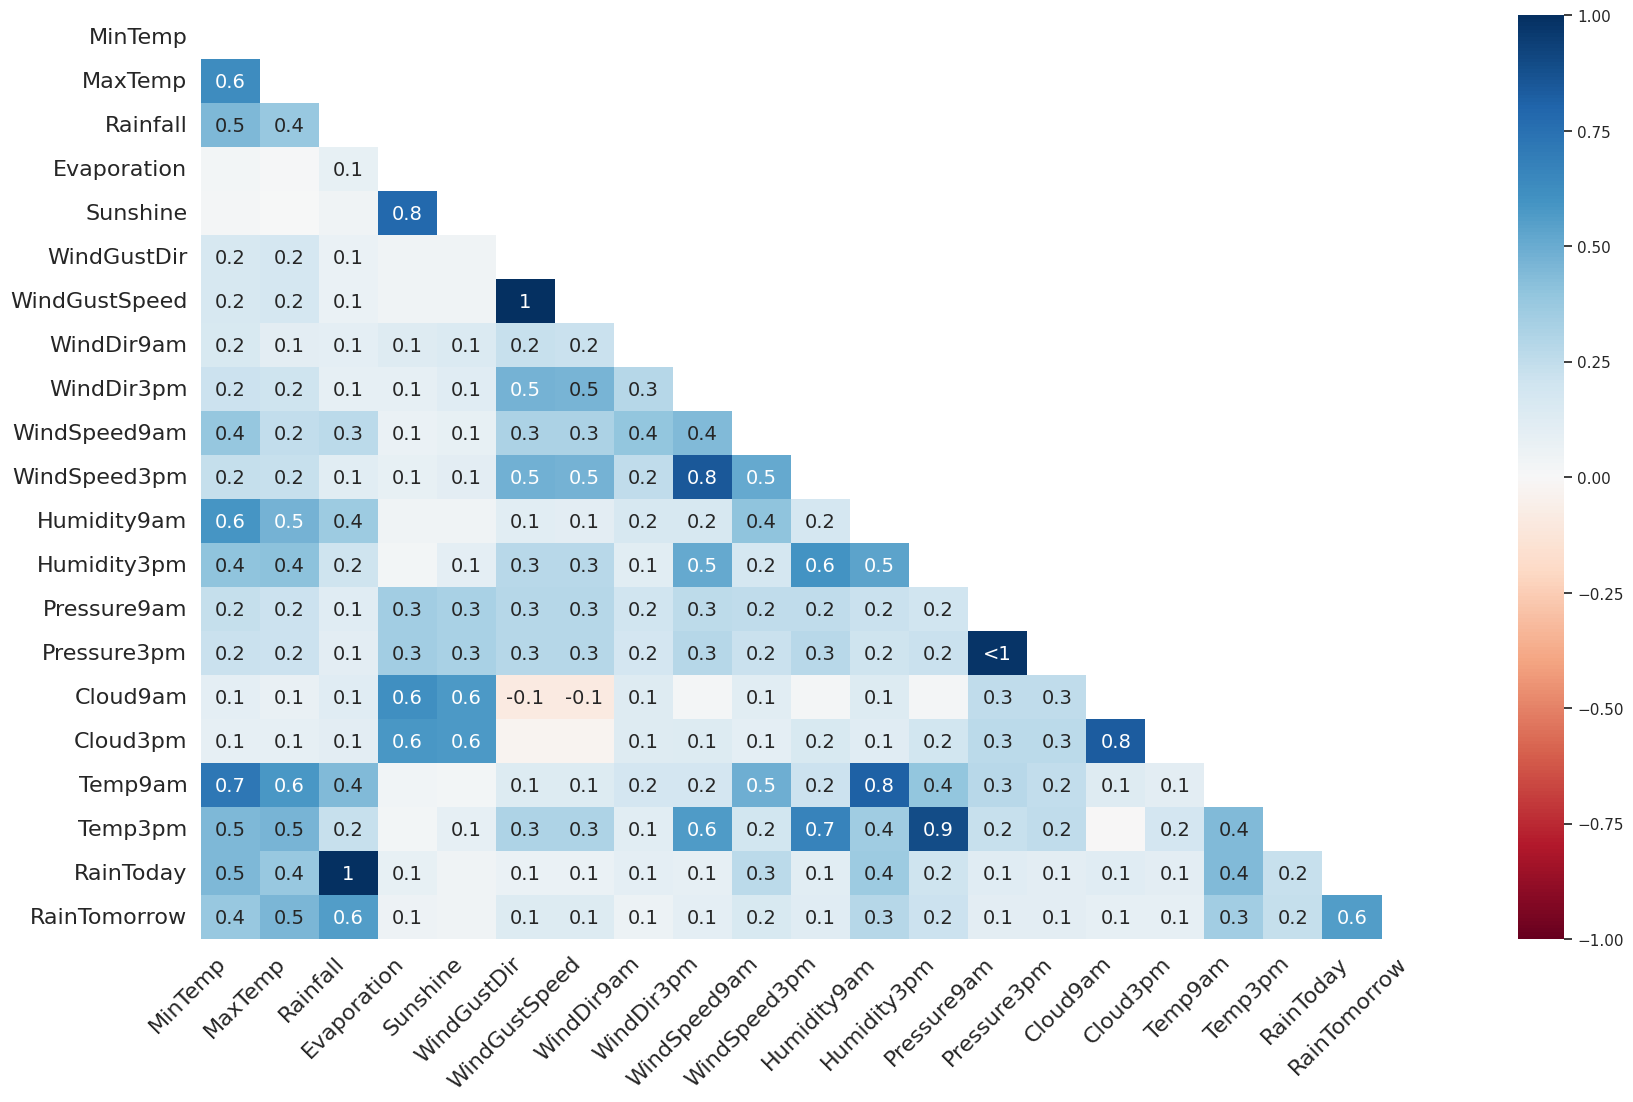

In [7]:
msno.heatmap(df)

In [8]:
df.isnull()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145456,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145457,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145458,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

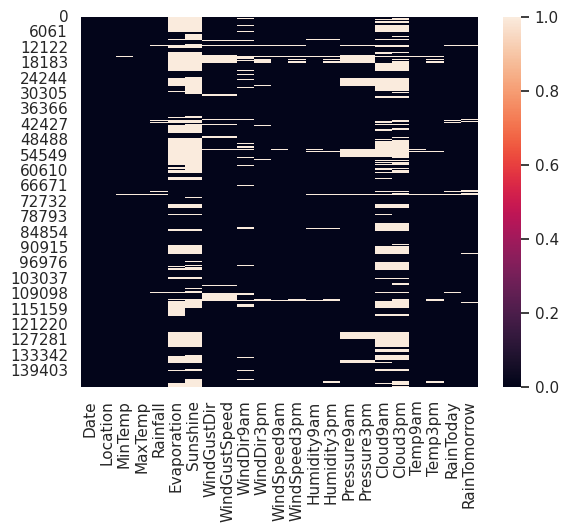

In [9]:
import seaborn as sns
sns.heatmap(df.isnull())

<Axes: xlabel='WindDir9am', ylabel='count'>

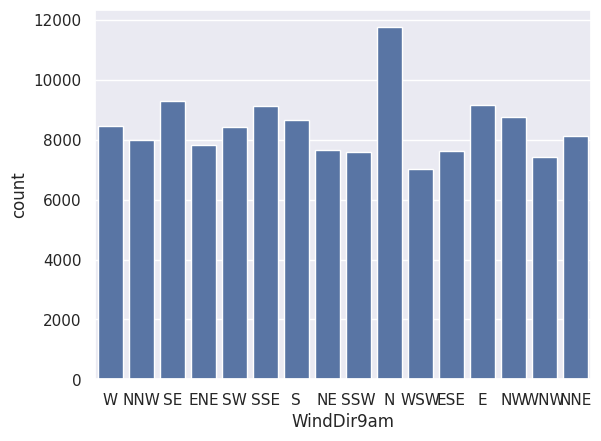

In [13]:
sns.countplot(df, x="WindDir9am")

<ipython-input-16-ece40fa3f50d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Cloud9am"].dropna(),kde=False,bins=30,color='green');


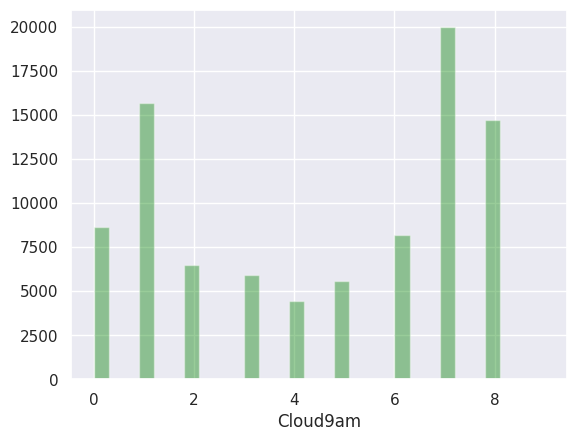

In [16]:
sns.distplot(df["Cloud9am"].dropna(),kde=False,bins=30,color='green');

In [ ]:
cont_feats = [col for col in df.columns if df[col].dtype != object]
cont_feats

In [ ]:
# Mean Imputation
mean_imputer = SimpleImputer(strategy='mean')
mean_imputed = mean_imputer.fit_transform(df[cont_feats])
df_mean_imputed = pd.DataFrame(mean_imputed, columns=cont_feats)



In [ ]:
# Median Imputation
median_imputer = SimpleImputer(strategy='median')
median_imputed = median_imputer.fit_transform(df[cont_feats])
df_median_imputed = pd.DataFrame(median_imputed, columns=cont_feats)

In [ ]:
# Iterative Imputation
iter_imputer = IterativeImputer(random_state=42)
iter_imputed = iter_imputer.fit_transform(df[cont_feats])
df_iter_imputed = pd.DataFrame(iter_imputed, columns=cont_feats)

x = ('apple', 'banana', 'cherry')

y = enumerate(x)

print(list(y))

#[(0, 'apple'), (1, 'banana'), (2, 'cherry')]

In [ ]:
dfs = [df_mean_imputed, df_median_imputed, df_iter_imputed]
#i = enumerate(dfs)
#list(i)
for i, df in enumerate(dfs):
  print(i)
  print(df)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Plotting a comparison between the different strategies
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(8, 12))
axes = np.reshape(axes, -1)

dfs = [df_mean_imputed, df_median_imputed, df_iter_imputed]
titles = ['Mean Imputation', 'Median Imputation', 'Iterative Imputation']

for i, df in enumerate(dfs):
    # Plotting the data
    #x = df.Pressure9am
    #y = df.Pressure3pm
    sns.scatterplot(data=df, x="Pressure9am", y="Pressure3pm",ax=axes[i], color='green')

    # Fitting and plotting a linear regression line
    x = df.Pressure9am
    y = df.Pressure3pm
    m, b = np.polyfit(x, y, 1)
    linreg = m*x + b
    axes[i].plot(x, linreg, color='black')

    # Setting the titles and including the RMSE values
    axes[i].set_title(titles[i], fontsize=16, fontweight='bold')
    rmse = round(mean_squared_error(y, linreg, squared=False), 3)
    axes[i].text(1025, 983, f'RMSE: {rmse}', fontsize=14, fontweight='bold')

#Conclusion
###**Simple imputation** strategies such as using the **mean or median** can be effective when working with **univariate data.**

###When working with **multivariate data,** more advanced imputation methods such as **iterative imputation** can lead to even better results. Scikit-learn’s IterativeImputer provides a quick and easy way to implement such a strategy.